In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [6]:
#creating database connection
conn=sqlite3.connect('inventory.db')

df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897


In [4]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


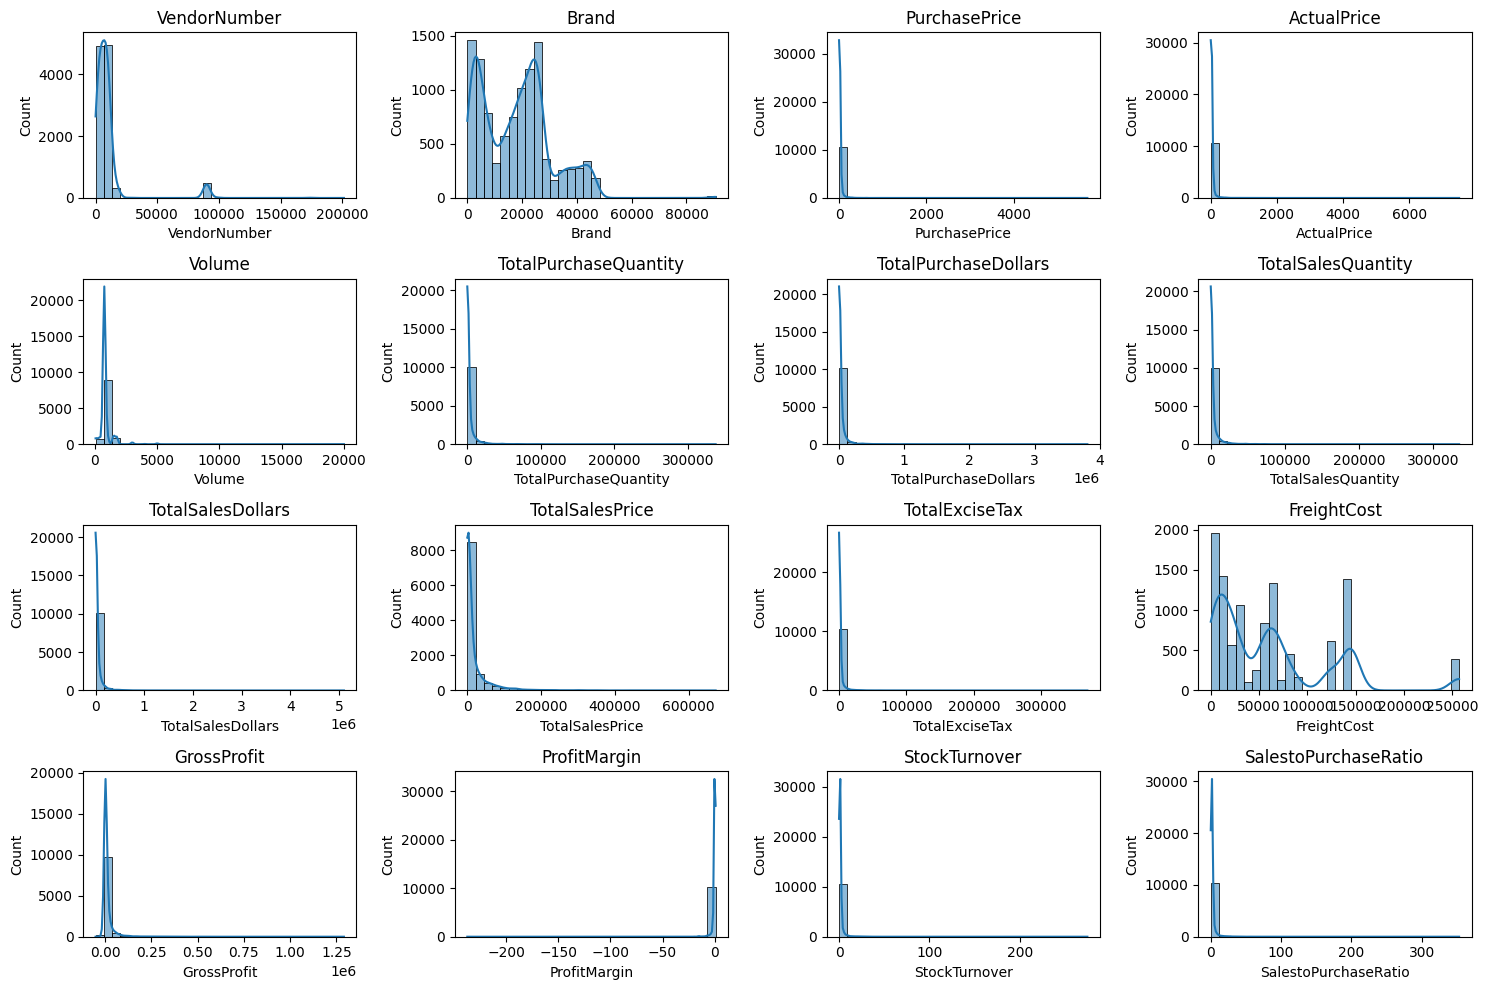

In [5]:
#Distribution Plots for Numerical Columns
numerical_cols= df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) 
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
numerical_cols= df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) 
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
df=pd.read_sql_query("""SELECT * 
FROM vendor_sales_summary 
WHERE GrossProfit>0 
AND ProfitMargin>0
AND TotalSalesQuantity>0""",conn)

In [7]:
df


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,0.834483,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,0.964362,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,0.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,0.989740,72.000000,97.469388


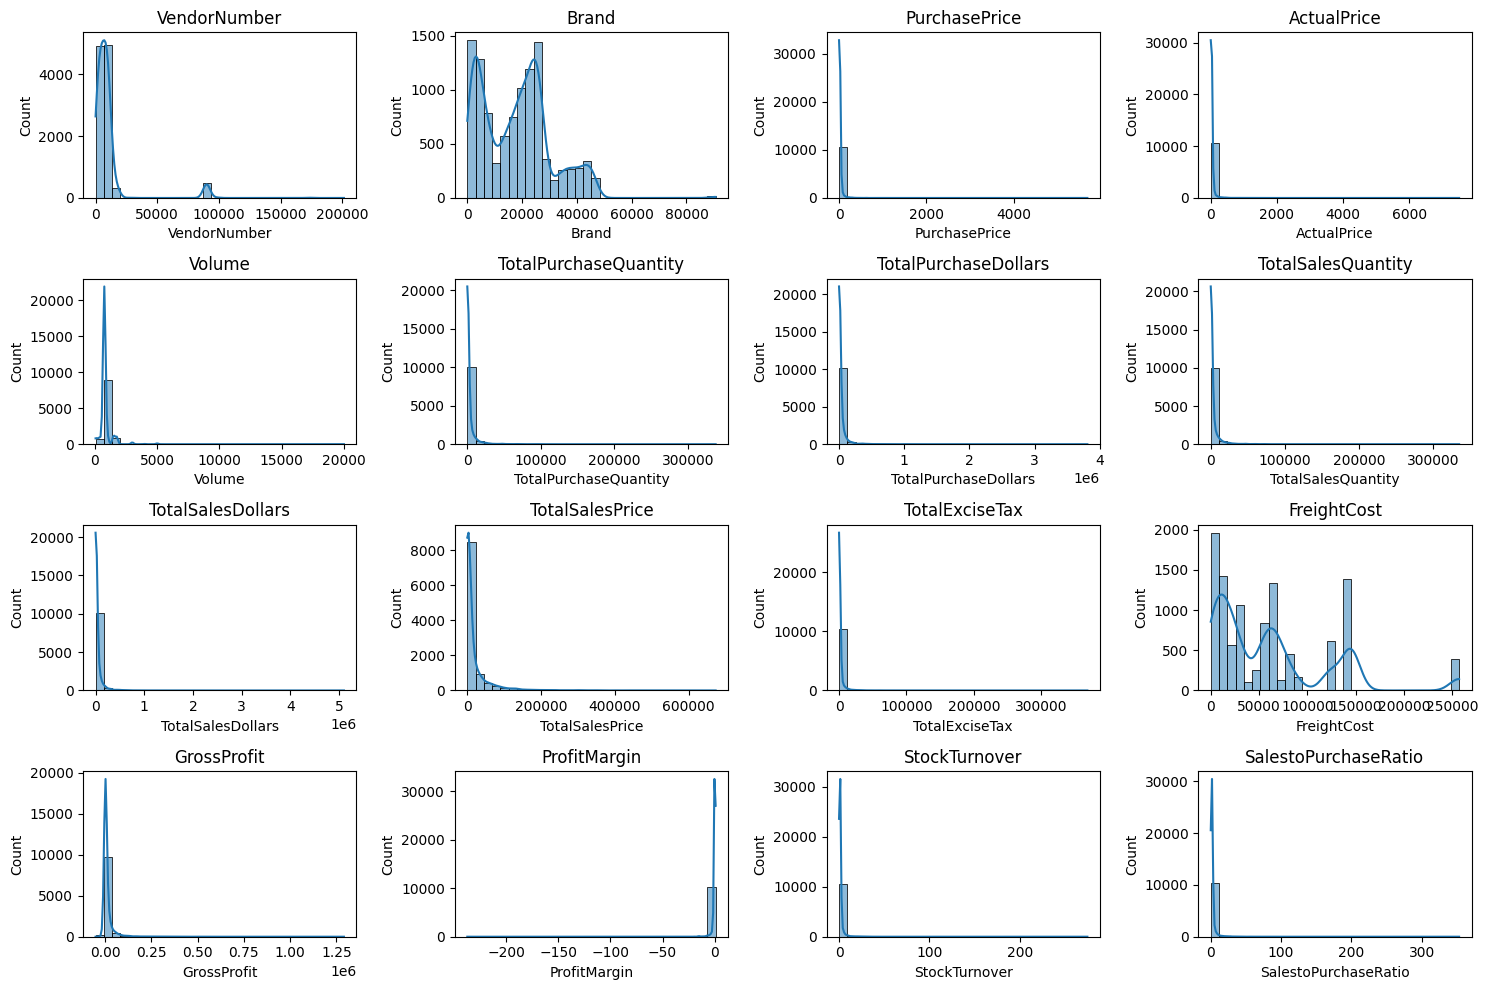

In [8]:
numerical_cols= df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) 
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

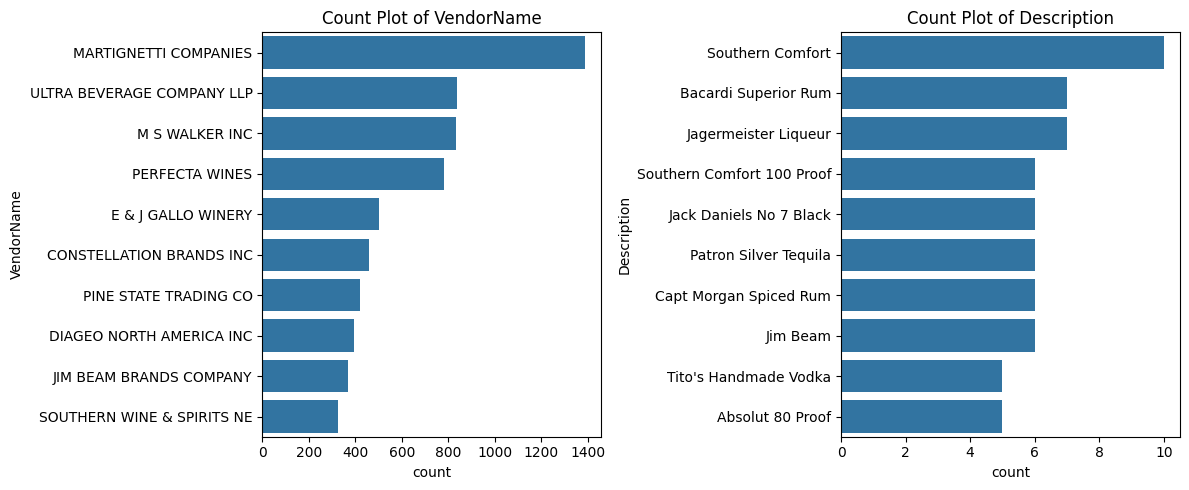

In [9]:
categorical_cols =["VendorName", "Description"]
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

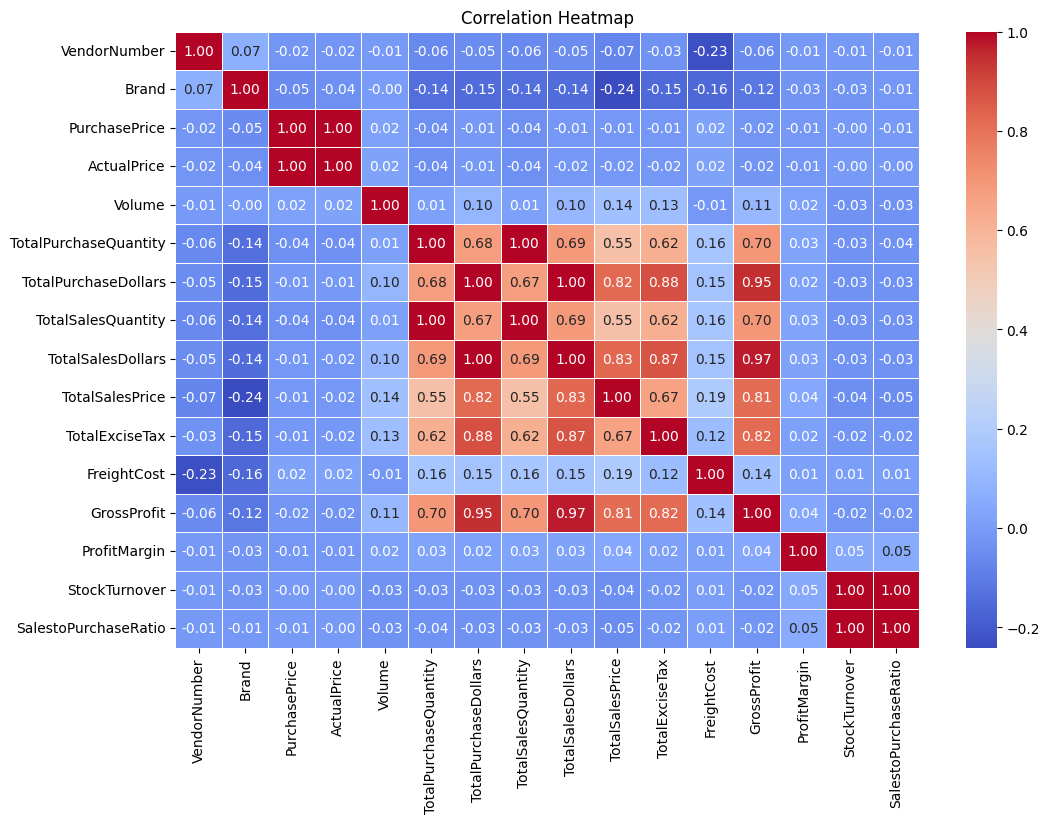

In [10]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#### Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins


In [11]:

brand_performance=df.groupby('Description').agg({
'TotalSalesDollars':'sum',
'ProfitMargin':'mean'}).reset_index()

In [12]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [13]:
low_sales_threshold


np.float64(286.185)

In [14]:
high_margin_threshold

np.float64(0.5619805605783905)

#### Filter Brands with low sales but high profit margins

In [15]:


target_brands=brand_performance[
    (brand_performance['TotalSalesDollars']<=low_sales_threshold)& (brand_performance['ProfitMargin']>=high_margin_threshold)]
print("Brands with Low Sales but High Profit Margin:")
display(target_brands.sort_values('TotalSalesDollars'))


Brands with Low Sales but High Profit Margin:


,Description,TotalSalesDollars,ProfitMargin
7777,Santa Rita Organic Svgn Bl,9.99,0.664665
2896,Debauchery Pnt Nr,11.58,0.659758
2537,Concannon Glen Ellen Wh Zin,15.95,0.834483
2677,Crown Royal Apple,27.86,0.898062
7818,Sauza Sprklg Wild Berry Marg,27.96,0.821531
...,...,...,...
8939,Tommasi Poggio Tufo Cab Svgn,269.73,0.747896
9229,Vigne A Porrona Rosso,272.79,0.968254
3980,Gifft Chardonnay,279.80,0.942459
5736,Mad Dogs & Englishmen Jumil,279.80,0.976662


In [16]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]

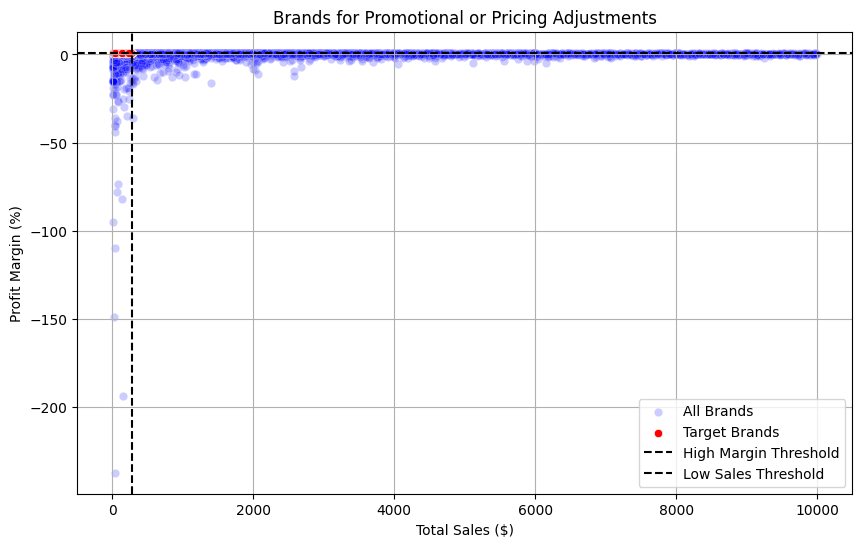

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha= 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

#### Which vendors and brands demonstrate the highest sales performance?

In [19]:

#top vendors and brands by sales performance
top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      68739834.97
MARTIGNETTI COMPANIES         40960117.82
PERNOD RICARD USA             32279544.17
JIM BEAM BRANDS COMPANY       31898621.16
BACARDI USA INC               25005365.79
CONSTELLATION BRANDS INC      24467134.23
E & J GALLO WINERY            18553774.66
BROWN-FORMAN CORP             18476611.60
ULTRA BEVERAGE COMPANY LLP    17802646.10
M S WALKER INC                15436066.26
Name: TotalSalesDollars, dtype: float64

In [20]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

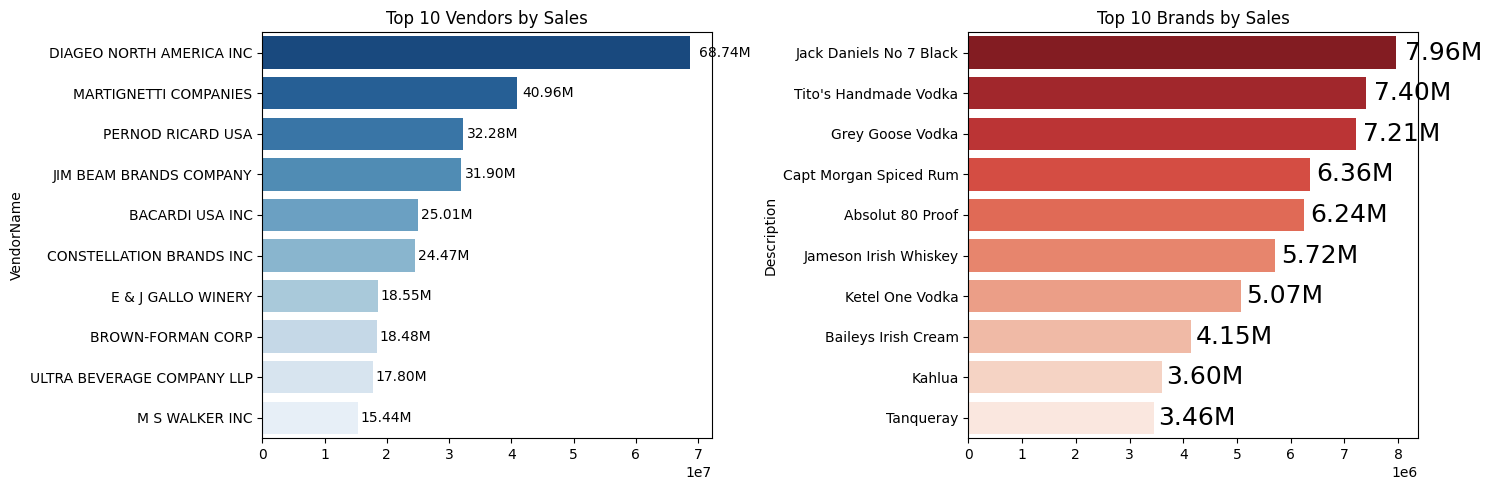

In [21]:
plt.figure(figsize=(15, 5))

#Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')


#Plot for Top Brands
plt.subplot(1, 2, 2)
ax2=sns.barplot(y=top_brands.index.astype(str), x =top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")
for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=18, color='black')
plt.tight_layout()
plt.show()

#### Which vendor contribute the most to total purchase dollars?

In [22]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'}).reset_index()
vendor_performance.shape

(128, 4)

In [23]:
vendor_performance['Purchase_Contribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100
vendor_performance=round(vendor_performance.sort_values('Purchase_Contribution%',ascending=False),2)

In [24]:
#display top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
28,DIAGEO NORTH AMERICA INC,50.96M,17.78M,68.74M,15.83
63,MARTIGNETTI COMPANIES,27.86M,13.10M,40.96M,8.66
50,JIM BEAM BRANDS COMPANY,24.20M,7.70M,31.90M,7.52
74,PERNOD RICARD USA,24.12M,8.16M,32.28M,7.49
8,BACARDI USA INC,17.62M,7.38M,25.01M,5.48
23,CONSTELLATION BRANDS INC,15.57M,8.89M,24.47M,4.84
14,BROWN-FORMAN CORP,13.53M,4.95M,18.48M,4.20
114,ULTRA BEVERAGE COMPANY LLP,13.21M,4.59M,17.80M,4.10
33,E & J GALLO WINERY,12.29M,6.26M,18.55M,3.82
59,M S WALKER INC,10.94M,4.50M,15.44M,3.40


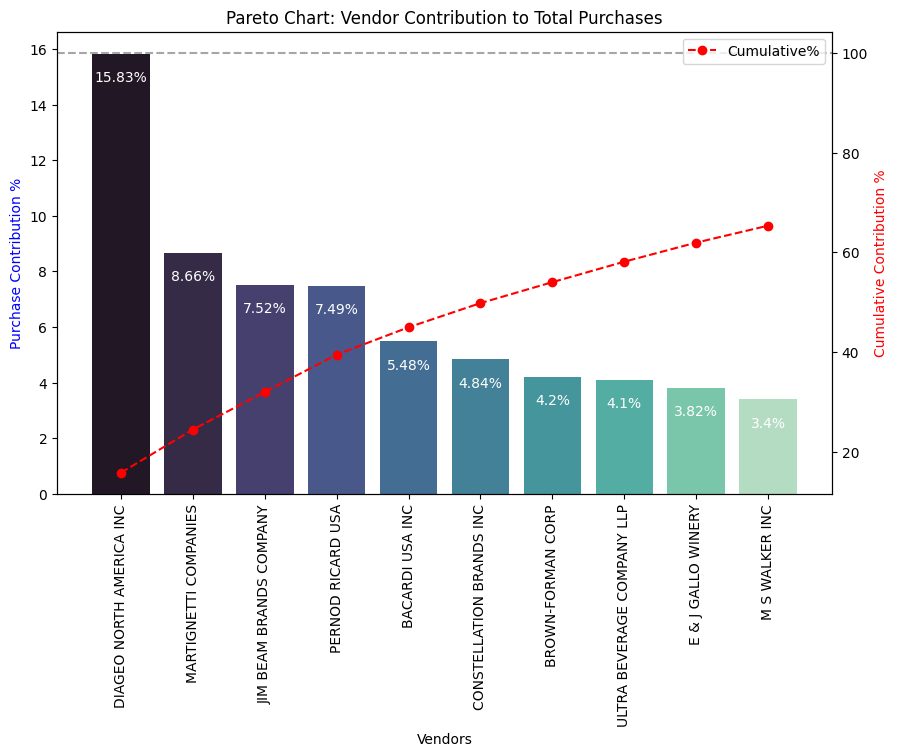

In [25]:

top_vendors['Cumulative_Contribution%']=top_vendors['Purchase_Contribution%'].cumsum()


fig,ax1=plt.subplots(figsize=(10, 6))

#Bar plot for Purchase Contribution
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['Purchase_Contribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

#Line Plot for Cumulative Contribution
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100,color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

#### How much of total procurement is dependent on the top vendors?

In [26]:
print(f"Total Purchase Contribution of Top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)}%")

Total Purchase Contribution of Top 10 vendors is 65.34%


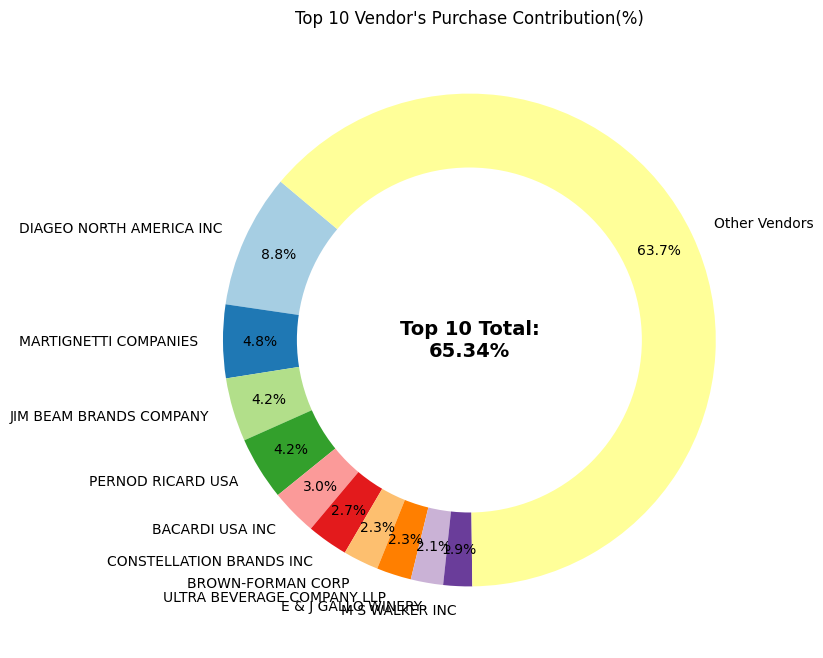

In [27]:
vendors=list(top_vendors['VendorName'].values)
purchase_contributions=list(top_vendors['Purchase_Contribution%'].values)
total_contribution=sum(purchase_contributions)
remaining_contribution=180-total_contribution

#Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax=plt.subplots(figsize=(8, 8))
wedges, texts, autotexts=ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%', 
                         startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)
#Draw a white circle in the center to create a "donut" effect
centre_circle=plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution(%)")
plt.show()

#### Does purchasing in bulk reduce the unit price,and what is the optimal purchase volume for cost savings?


In [28]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df["OrderSize"]=pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])
df[['OrderSize','TotalPurchaseQuantity']]
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,43.776954
Medium,17.894005
Large,11.308807


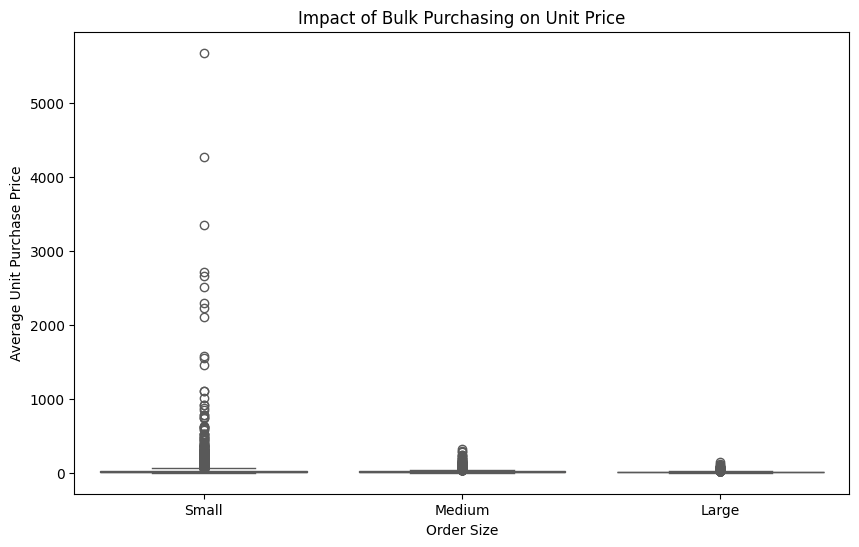

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

#### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [30]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)


,StockTurnover
VendorName,
AAPER ALCOHOL & CHEMICAL CO,0.000000
LAUREATE IMPORTS CO,0.000000
TRUETT HURST,0.041667
"IRA GOLDMAN AND WILLIAMS, LLP",0.075000
HIGHLAND WINE MERCHANTS LLC,0.148920
UNCORKED,0.217238
MILTONS DISTRIBUTING CO,0.236111
VINEYARD BRANDS LLC,0.256241
LOYAL DOG WINERY,0.308333


#### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?


In [31]:
df["UnsoldInventoryValue"]=(df["TotalPurchaseQuantity"]-df["TotalSalesQuantity"])*df["PurchasePrice"]
print('Total Unsold Capital:',format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 8.75M


In [32]:
#Aggregate capital locked per vendor
inventory_value_per_vendor=df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#sort vendors with the highest locked capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"]=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
28,DIAGEO NORTH AMERICA INC,980.09K
63,MARTIGNETTI COMPANIES,928.99K
50,JIM BEAM BRANDS COMPANY,857.80K
114,ULTRA BEVERAGE COMPANY LLP,780.27K
73,PERFECTA WINES,571.81K
74,PERNOD RICARD USA,554.74K
59,M S WALKER INC,469.96K
125,WILLIAM GRANT & SONS INC,436.49K
33,E & J GALLO WINERY,315.20K
14,BROWN-FORMAN CORP,284.91K


#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [33]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)

In [34]:
top_vendors=df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
top_vendors


0       0.252977
1       0.210628
2       0.246758
3       0.271399
4       0.284128
          ...   
5530    0.930859
5648    0.900215
5651    0.898835
5773    0.950125
5945    0.942719
Name: ProfitMargin, Length: 2673, dtype: float64

In [35]:
low_vendors=df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()
low_vendors

2147    -193.785971
2456           -inf
2462    -112.726844
2528           -inf
2982           -inf
            ...    
10687      0.834483
10688      0.964362
10689      0.252525
10690      0.989740
10691      0.991661
Name: ProfitMargin, Length: 2673, dtype: float64

In [36]:
def confidence_interval(data, confidence=0.95):
    mean_val=np.mean(data)
    std_err = np.std(data,ddof= 1 ) /np.sqrt(len(data))# Standard error
    t_critical=stats.t.ppf((1+ confidence) / 2, df=len(data)-1)
    margin_of_error=t_critical*std_err
    return mean_val, mean_val-margin_of_error, mean_val+margin_of_error
    

Top Vendors 95% CI: (0.30, 0.31, Mean: 0.30
Low Vendors 95% CI: (nan,  nan, Mean: -inf


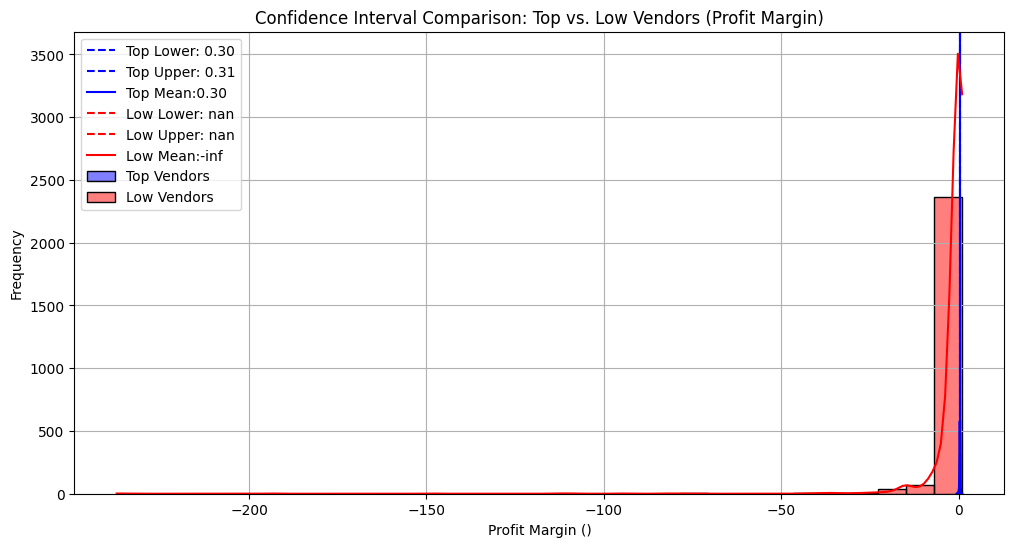

In [41]:
top_mean, top_lower, top_upper=confidence_interval(top_vendors)
low_mean, low_lower, low_upper=confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper: 2f}, Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

#Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean:{top_mean:.2f}")

#Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean:{low_mean:.2f}")

#Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin ()")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

#### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H0 (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.


H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.


In [40]:
top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

top_vendors=df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendors=df[df["TotalSalesDollars"]<=low_threshold]["ProfitMargin"].dropna()

#Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

#Print results
print(f"T-Statistic:{t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")

T-Statistic:nan, P-Value: nan
Fail to Reject H0: No significant difference in profit margins.
